In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense,BatchNormalization,LeakyReLU
from tensorflow.python.keras.models import load_model

In [11]:
X_train, X_test, y_train, y_test = np.load('processed_images.npy',allow_pickle=True)

## 最終的なモデル


１つめと２つめのノートでいろいろなパラメータ調整はやっていきましたが、<br>
今回はその完成モデルを構築していきます。

In [12]:
model = Sequential()

model.add(Conv2D(32,3,input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Dropout(0.2))

model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
adam = Adam(lr=1e-3)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=1, validation_split=0.1)

Epoch 1/40
79/79 [==============================] - 8s 91ms/step - loss: 1.0369 - accuracy: 0.6172 - val_loss: 3.8503 - val_accuracy: 0.1674
Epoch 2/40
79/79 [==============================] - 7s 83ms/step - loss: 0.6874 - accuracy: 0.7474 - val_loss: 4.4666 - val_accuracy: 0.1674
Epoch 3/40
79/79 [==============================] - 7s 83ms/step - loss: 0.5772 - accuracy: 0.7839 - val_loss: 3.6591 - val_accuracy: 0.2262
Epoch 4/40
79/79 [==============================] - 7s 83ms/step - loss: 0.5184 - accuracy: 0.8144 - val_loss: 3.0221 - val_accuracy: 0.3758
Epoch 5/40
79/79 [==============================] - 7s 83ms/step - loss: 0.4801 - accuracy: 0.8212 - val_loss: 1.8009 - val_accuracy: 0.5272
Epoch 6/40
79/79 [==============================] - 7s 83ms/step - loss: 0.4281 - accuracy: 0.8406 - val_loss: 0.9143 - val_accuracy: 0.7053
Epoch 7/40
79/79 [==============================] - 6s 82ms/step - loss: 0.4085 - accuracy: 0.8488 - val_loss: 0.8533 - val_accuracy: 0.7400
Epoch 8/40
79

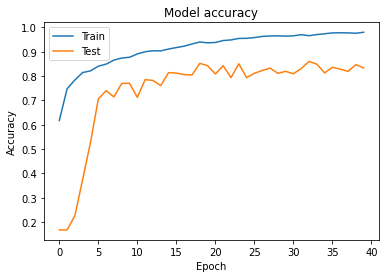

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

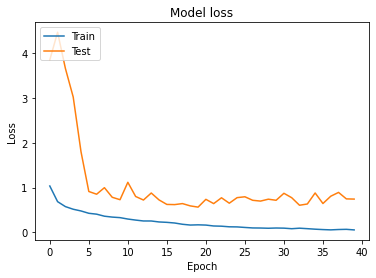

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 最終モデルを決めるまでの流れ



1.   精度が一番安定していた初期のモデルから変更
2.   プーリングのサイズを大きくしたら若干改善
2.   収束が緩やかになったのでエポック数を増やす。
3.   学習率を上げて収束を早くするとさらに改善



上記のような流れでモデルを決定しました。

## モデルを保存

In [16]:
model.save('intel_model.h5')

### モデル評価

In [20]:
scores = model.evaluate(X_test,y_test)
print(f'Loss: {scores[0]}' )
print(f'Accuracy: {scores[1] * 100}' )

88/88 [==============================] - 1s 9ms/step - loss: 0.7477 - accuracy: 0.8276
Loss: 0.7477222681045532
Accuracy: 82.75738954544067


モデルを評価すると、そこそこいい精度がでていることがわかります。

## モデル予測

実際にテストデータで予測があっているか見てみましょう。

In [21]:
# 予測データを格納
y_pred = model.predict(X_test)  

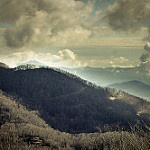

In [28]:
# 適当にデータを選ぶ
img = array_to_img(X_test[5])
img

In [30]:
labels = ['building','forest','glacier','mountain','sea','streeet']
print(labels)
print('実際の画像：',labels[np.argmax(y_test[5])])
print('予測：',labels[np.argmax(y_pred[5])])

['building', 'forest', 'glacier', 'mountain', 'sea', 'streeet']
実際の画像： mountain
予測： mountain


上記は予測が当たっているケースです。<br>
もちろん約８０％なので、外れていることもあります。

## まとめ

まだ改善の余地はあるかもしれませんが、安定した結果が出たのでこれでひとまずは決定したいと思います。<br>
さらに転移学習による分類でさらに精度が上がるかも見ていきます。